In [1]:
import localSettings as ls
from load_data_run123 import *
from unblinding_far_sideband import *
from matplotlib import pyplot as plt

In [4]:
fold = "nuselection"
tree = "NeutrinoSelectionFilter"

'''
# Run 1
PATH = "/Users/dcaratelli/data/searchingfornues/v08_00_00_48/run1/nslice/"
#PATHDATA = "/Users/dcaratelli/data/searchingfornues/v08_00_00_48/farsidebands/nslice/"
PATHDATA = "/Users/dcaratelli/data/searchingfornues/v08_00_00_48/run1/nslice/"
fext = PATH+"data_extbnb_mcc9.1_v08_00_00_25_reco2_C_all_reco2.root"
#fdata = PATHDATA+"run1_neutrinoselection_filt_numu_ALL.root"
fdata = PATHDATA+'data_bnb_mcc9.1_v08_00_00_25_reco2_C1_beam_good_reco2_5e19.root'
fnu = PATH+"prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run1_reco2_reco2.root"
'''

'''
# Run 2
PATH = "/Users/dcaratelli/data/searchingfornues/v08_00_00_48/run2/nslice/"
PATHDATA = "/Users/dcaratelli/data/searchingfornues/v08_00_00_48/farsidebands/nslice/"
fext = PATH+"data_extbnb_mcc9.1_v08_00_00_25_reco2_D_E_all_reco2.root"
fdata = PATHDATA+"run2_neutrinoselection_filt_numu_ALL.root"
fnu = PATH+"prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run2_reco2_D1D2_reco2.root"
'''

'''
# Run 3
PATH = "/Users/dcaratelli/data/searchingfornues/v08_00_00_48/run3/nslice/"
PATHDATA = "/Users/dcaratelli/data/searchingfornues/v08_00_00_48/farsidebands/nslice/"
fext = PATH+"data_extbnb_mcc9.1_v08_00_00_25_reco2_F_G_all_reco2.root"
fdata = PATHDATA+"run3_neutrinoselection_filt_numu_ALL.root"
fnu = PATH+"prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run3_reco2_G_reco2.root"
'''

#'''
# Run 4
PATH = "/Users/dcaratelli/data/searchingfornues/v08_00_00_63/run4/1121/"
fext = PATH+"bnb_run4a_ext_reco2_v08_00_00_63_run4a_reco2_all.root"
fdata = PATH+"bnb_on_run4a_reco2_v08_00_00_63_POT_DEBUG_run4a_reco2_beam_good.root"
fnu = PATH+"nslice/prod_extunbiased_standard_nu_overlay_run4a_reco2_WC_v08_00_00_63_pndr_reco2_reco2_goodruns_goodbeam.root"
#'''

unu   = uproot.open(fnu)[fold][tree]
uext  = uproot.open(fext)[fold][tree]
udata = uproot.open(fdata)[fold][tree]

'''
vardict = get_variables()
variables = ['_opfilter_pe_beam','_opfilter_pe_veto','nslice','selected',\
             'reco_nu_vtx_sce_x','reco_nu_vtx_sce_y','reco_nu_vtx_sce_z',
             'trk_theta','trk_phi','trk_len','trk_score',
             'n_showers_contained','n_tracks_contained',
             "contained_fraction","sps_contained_fraction","trk_score",
             'topological_score','flash_pe','flash_time','run','shr_energy_tot_cali',
             'nu_pdg','ccnc','category']
#variables = vardict['VARIABLES']+vardict['NUEVARS']+vardict['RCVRYVARS'] #this adds many more variables...
variables = list(set(variables))
'''

VARDICT = get_variables()
variables = VARDICT['VARIABLES']

print("nu dataframe")
nu   = unu.pandas.df(variables+VARDICT['WEIGHTS']+VARDICT['SYSTVARS'], flatten=False)
print("ext dataframe")
ext  = uext.pandas.df(variables, flatten=False)
print("data dataframe")
data = udata.pandas.df(variables, flatten=False)

nu dataframe
ext dataframe
data dataframe


In [5]:
print(variables)

['nu_pdg', 'slpdg', 'backtracked_pdg', 'category', 'ccnc', 'endmuonmichel', 'run', 'sub', 'evt', 'CosmicIP', 'CosmicDirAll3D', 'CosmicIPAll3D', 'flash_pe', 'trk_llr_pid_score_v', '_opfilter_pe_beam', '_opfilter_pe_veto', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'nproton', 'nu_e', 'nneutron', 'mc_pdg', 'slnunhits', 'slnhits', 'true_e_visible', 'npi0', 'npion', 'pion_e', 'muon_e', 'pi0truth_elec_etot', 'pi0_e', 'evnunhits', 'nslice', 'interaction', 'proton_e', 'slclustfrac', 'reco_nu_vtx_x', 'reco_nu_vtx_y', 'reco_nu_vtx_z', 'true_nu_vtx_sce_x', 'true_nu_vtx_sce_y', 'true_nu_vtx_sce_z', 'true_nu_vtx_x', 'true_nu_vtx_y', 'true_nu_vtx_z', 'topological_score', 'isVtxInFiducial', 'theta']


In [6]:
uproot_v = [unu,uext,udata]
df_v = [nu,ext,data]

In [8]:
for i,df in enumerate(df_v):
    process_uproot_numu(uproot_v[i],df)

/Users/dcaratelli/opt/anaconda3/envs/python3/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
# fix weights that are out of scale
for i,df in enumerate([nu]):
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.

In [10]:
# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["nslice"])
    df["extdata"] = np.zeros_like(df["nslice"])
data["bnbdata"] = np.ones_like(data["nslice"])
ext["extdata"] = np.ones_like(ext["nslice"])

In [11]:
import plotter
import importlib
importlib.reload(plotter)

nue = nu.query('abs(nu_pdg) == 12 and ccnc == 0')

samples = {'mc': nu, 'nue': nue, 'ext': ext, 'data': data}

# run 1
#weights = {'mc': 0.123664, 'nue': 0.123664, 'ext': 0.551968}
#plotter = plotter.Plotter(samples, weights, pot=1.62e+20)

# run 1 5e19
#weights = {'mc': 0.033, 'nue': 0.033, 'ext': 0.15}
#plotter = plotter.Plotter(samples, weights, pot=0.456e+20)

# run 2
#weights = {'mc': 0.2568, 'nue': 0.2568, 'ext': 0.4049}
#plotter = plotter.Plotter(samples, weights, pot=2.62e+20)

# run 3
#weights = {'mc': 0.190, 'nue': 0.190, 'ext': 0.296}
#plotter = plotter.Plotter(samples, weights, pot=2.55e+20)

# run 4 tor 860 w/ full run range
#weights = {'mc': 0.129, 'nue': 0.129, 'ext': 0.328}
#plotter = plotter.Plotter(samples, weights, pot=0.460e+20)

# run 4 tor 875
#weights = {'mc': 0.092, 'nue': 0.092, 'ext': 0.318}
#plotter = plotter.Plotter(samples, weights, pot=0.305e+20)

# run 4 tor 860
weights = {'mc': 0.107, 'nue': 0.107, 'ext': 0.318}
plotter = plotter.Plotter(samples, weights, pot=0.337e+20)

/Users/dcaratelli/Neutrinos/NUE/TUTORIAL/plotter.py:288: UserWarning: Missing dirt sample
  warnings.warn("Missing dirt sample")


In [13]:
import unblinding_far_sideband
QUERY = unblinding_far_sideband.NUMUSEL

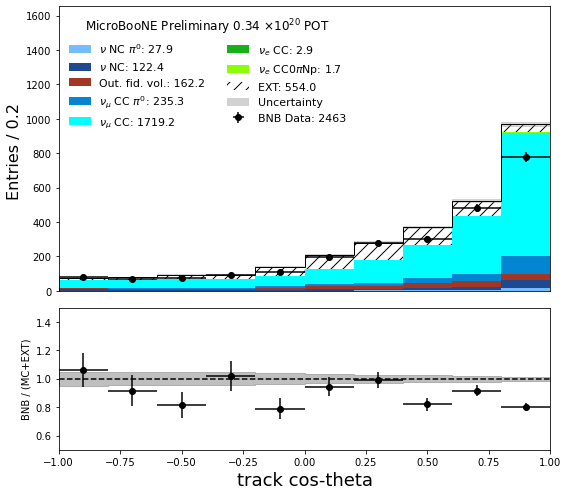

In [16]:
DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

#SEL = '( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)'
#SEL += ' and nslice==1 and trk_theta < 1.0 and topological_score > 0.5'
#SEL += ' and (run < 19080 or run > 19420)'
#SEL += ' and topological_score > 0.5 and trk_theta < 0.5'
#SEL += ' and n_tracks_contained>0'

SEL = QUERY

#VARIABLE, BINS, RANGE, XTIT = 'flash_pe',1,(0,5000),r"vtx x [cm]" 
#VARIABLE, BINS, RANGE, XTIT = 'run',1,(18800,20000),r"vtx x [cm]" 
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',20,(0,260),r"vtx x [cm]" 
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',20,(-120,120),r"vtx y [cm]" 
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',20,(0,1000),r"vtx z [cm]" 
#VARIABLE, BINS, RANGE, XTIT = 'topological_score',20,(0.,1),r"topological score" 
#VARIABLE, BINS, RANGE, XTIT = 'trk_theta',20,(0,np.pi),r"track theta" 
VARIABLE, BINS, RANGE, XTIT = 'muon_theta',10,(-1,1),r"track cos-theta" 
#VARIABLE, BINS, RANGE, XTIT = 'trk_phi',20,(-np.pi,np.pi),r"track phi" 
#VARIABLE, BINS, RANGE, XTIT = 'trk_len',10,(0,400),r"track length" 
#VARIABLE, BINS, RANGE, XTIT = 'contained_fraction',10,(0,1.0),r"contained fraction" 
#VARIABLE, BINS, RANGE, XTIT = 'trk_score',10,(0.99,1.0),r"track score" 
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',5,(-0.5,4.5),r"number of contained showers" 
#VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',5,(-0.5,4.5),r"number of contained tracks" 
#VARIABLE, BINS, RANGE, XTIT = 'dvtx',5,(-0.5,4.5),r"vertex distance" 
#VARIABLE, BINS, RANGE, XTIT = 'shr_energy_tot_cali',20,(0.01,1.0),r"shower energy [MeV]" 
#VARIABLE, BINS, RANGE, XTIT = 'selected',2,(-0.5,1.5),r"selected" 
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',14,(0.15, 1.45),r"Reconstructed Energy [ GeV ]" # ~reproduce Fig. 36 of PeLEE TN!
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',[0,0.5,0.8,1.5],None,r"Reconstructed Energy [ GeV ]"
#VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',5,(-0.5,4.5),r"Reconstructed Energy [ GeV ]"

fig, ax1, ax2 = plotter.plot_variable(
    VARIABLE,   
    query=SEL,
    kind="event_category",
    draw_sys=False,
    detsysdict=DETSYS,
    ratio=True,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title('', loc='left')
#ax1.set_yscale('log')
ax1.set_ylim(0, ax1.get_ylim()[1]*1.6)
ax2.set_ylim(0.5, 1.5)

plt.tight_layout()
